In [1]:
# Importing the required libraries and modules 
import re
!pip install PyPDF2
from PyPDF2 import PdfReader
import string

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize

from wordcloud import WordCloud
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('omw-1.4')
from collections import Counter
from collections import OrderedDict

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.4/220.4 kB 2.9 MB/s eta 0:00:00


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


In [2]:
# Function which returns string containing contents of .txt file at file_path
def txt_file_to_string(file_path):  
    with open(file_path, "r", encoding = "utf8") as curr:
        text = curr.read()
        text = text.replace("\n", " ").replace("\r", " ")
    return text

In [3]:
# T1
book_one_path = "../input/processed-text-1/processed_text_1.txt"
Original_T1 = txt_file_to_string(book_one_path)
Original_T1

'an operating system is a program that manages the computer hardware it  also provides a basis for application programs and acts as an intermediary  between the computer user and the computer hardware an amazing aspect  of operating systems is how varied they are in accomplishing these tasks  mainframe operating systems are designed primarily to optimize utilization  of hardware personal computer pc operating systems support complex  games business applications and everything in between operating systems  for handheld computers are designed to provide an environment in which a  user can easily interface with the computer to execute programs thus some  operating systems are designed to be convenient others to be efficient and others  some combination of the two  before we can explore the details of computer system operation we need  to know something about system structure we begin by discussing the basic  functions of system startup i and storage we also describe the basic  computer ar

In [4]:
# Tokenizing and lemmatizing T1
lemmatizer = WordNetLemmatizer()
Tokenized_T1 = word_tokenize(Original_T1)
Final_T1 = [lemmatizer.lemmatize(i) for i in Tokenized_T1] 
Final_T1

['an',
 'operating',
 'system',
 'is',
 'a',
 'program',
 'that',
 'manages',
 'the',
 'computer',
 'hardware',
 'it',
 'also',
 'provides',
 'a',
 'basis',
 'for',
 'application',
 'program',
 'and',
 'act',
 'a',
 'an',
 'intermediary',
 'between',
 'the',
 'computer',
 'user',
 'and',
 'the',
 'computer',
 'hardware',
 'an',
 'amazing',
 'aspect',
 'of',
 'operating',
 'system',
 'is',
 'how',
 'varied',
 'they',
 'are',
 'in',
 'accomplishing',
 'these',
 'task',
 'mainframe',
 'operating',
 'system',
 'are',
 'designed',
 'primarily',
 'to',
 'optimize',
 'utilization',
 'of',
 'hardware',
 'personal',
 'computer',
 'pc',
 'operating',
 'system',
 'support',
 'complex',
 'game',
 'business',
 'application',
 'and',
 'everything',
 'in',
 'between',
 'operating',
 'system',
 'for',
 'handheld',
 'computer',
 'are',
 'designed',
 'to',
 'provide',
 'an',
 'environment',
 'in',
 'which',
 'a',
 'user',
 'can',
 'easily',
 'interface',
 'with',
 'the',
 'computer',
 'to',
 'execute',


In [5]:
# Finding frequency of tokens in T1
T1_frequency_distribution = FreqDist(Final_T1)
T1_frequency_distribution_org = T1_frequency_distribution
T1_frequency_distribution

FreqDist({'the': 25301, 'a': 14834, 'to': 10126, 'of': 9403, 'is': 7545, 'and': 7544, 'in': 6447, 'system': 5736, 'for': 4304, 'that': 4133, ...})

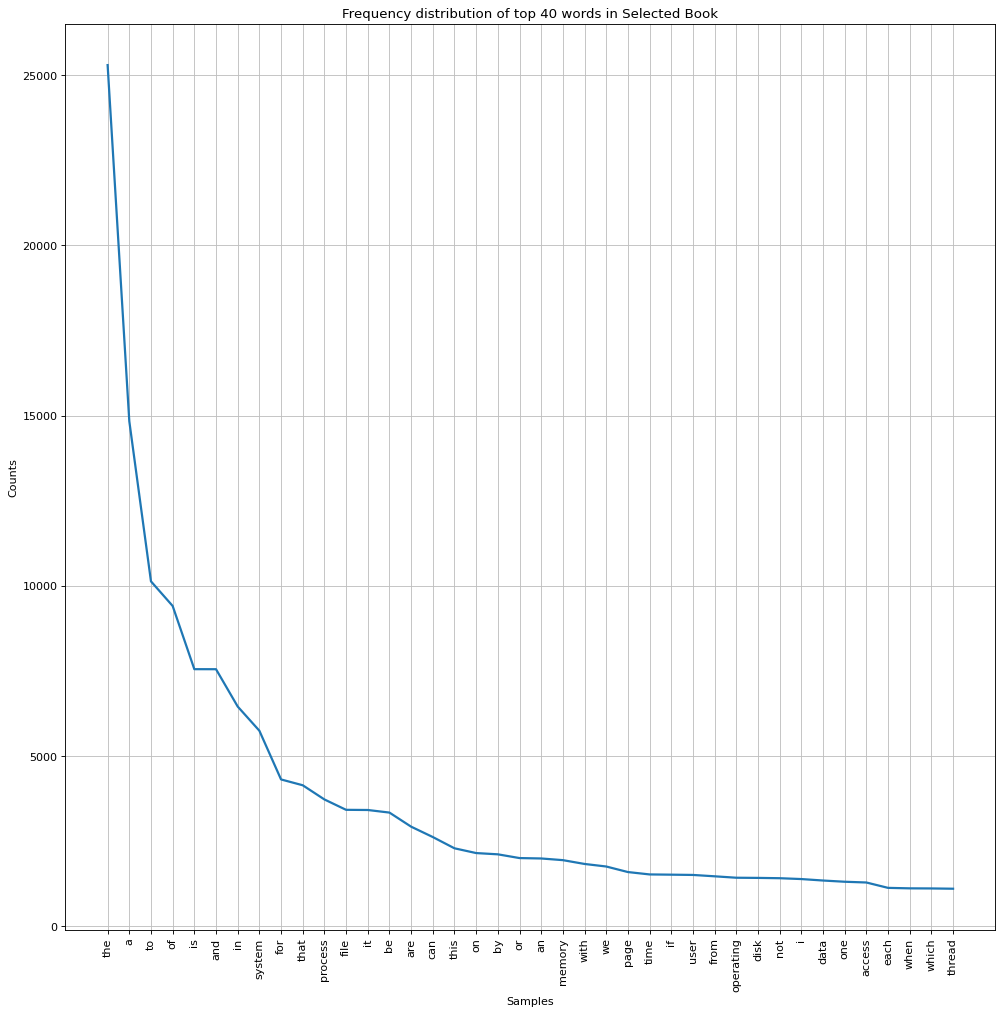

In [6]:
# Plotting the frequency distribution plot of the top 40 most frequent words for the book
figure(figsize=(15, 15), dpi = 80)
freq_graph = T1_frequency_distribution.plot(40, title = "Frequency distribution of top 40 words in Selected Book")

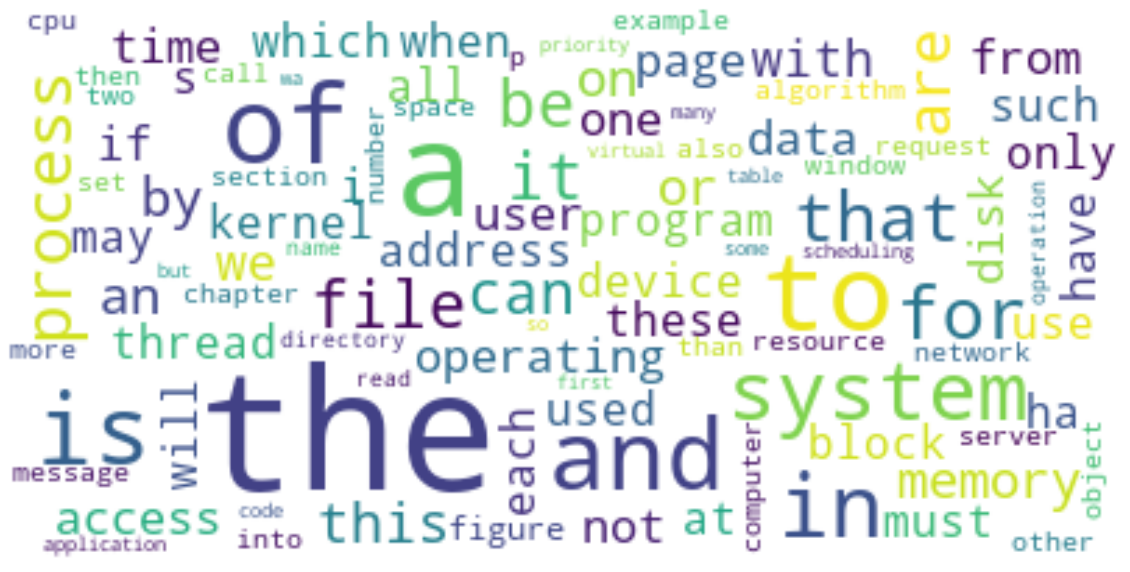

In [7]:
# Creating Word Cloud for the book
dictionary = Counter(T1_frequency_distribution)
cloud = WordCloud(max_font_size = 60, max_words = 100, background_color = "white").generate_from_frequencies(dictionary)
plt.figure(figsize = (20, 20))
plt.imshow(cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [8]:
# Removing stopwords from T1
remove_these = set(stopwords.words('english'))
Cleaned_T1 = [w for w in Final_T1 if not w in remove_these]
Cleaned_T1

['operating',
 'system',
 'program',
 'manages',
 'computer',
 'hardware',
 'also',
 'provides',
 'basis',
 'application',
 'program',
 'act',
 'intermediary',
 'computer',
 'user',
 'computer',
 'hardware',
 'amazing',
 'aspect',
 'operating',
 'system',
 'varied',
 'accomplishing',
 'task',
 'mainframe',
 'operating',
 'system',
 'designed',
 'primarily',
 'optimize',
 'utilization',
 'hardware',
 'personal',
 'computer',
 'pc',
 'operating',
 'system',
 'support',
 'complex',
 'game',
 'business',
 'application',
 'everything',
 'operating',
 'system',
 'handheld',
 'computer',
 'designed',
 'provide',
 'environment',
 'user',
 'easily',
 'interface',
 'computer',
 'execute',
 'program',
 'thus',
 'operating',
 'system',
 'designed',
 'convenient',
 'others',
 'efficient',
 'others',
 'combination',
 'two',
 'explore',
 'detail',
 'computer',
 'system',
 'operation',
 'need',
 'know',
 'something',
 'system',
 'structure',
 'begin',
 'discussing',
 'basic',
 'function',
 'system',
 

In [9]:
# Updating frequency distribution of T1 after removal of stop words
T1_frequency_distribution = FreqDist(Cleaned_T1)
T1_frequency_distribution

FreqDist({'system': 5736, 'process': 3716, 'file': 3411, 'memory': 1932, 'page': 1582, 'time': 1512, 'user': 1497, 'operating': 1415, 'disk': 1410, 'data': 1333, ...})

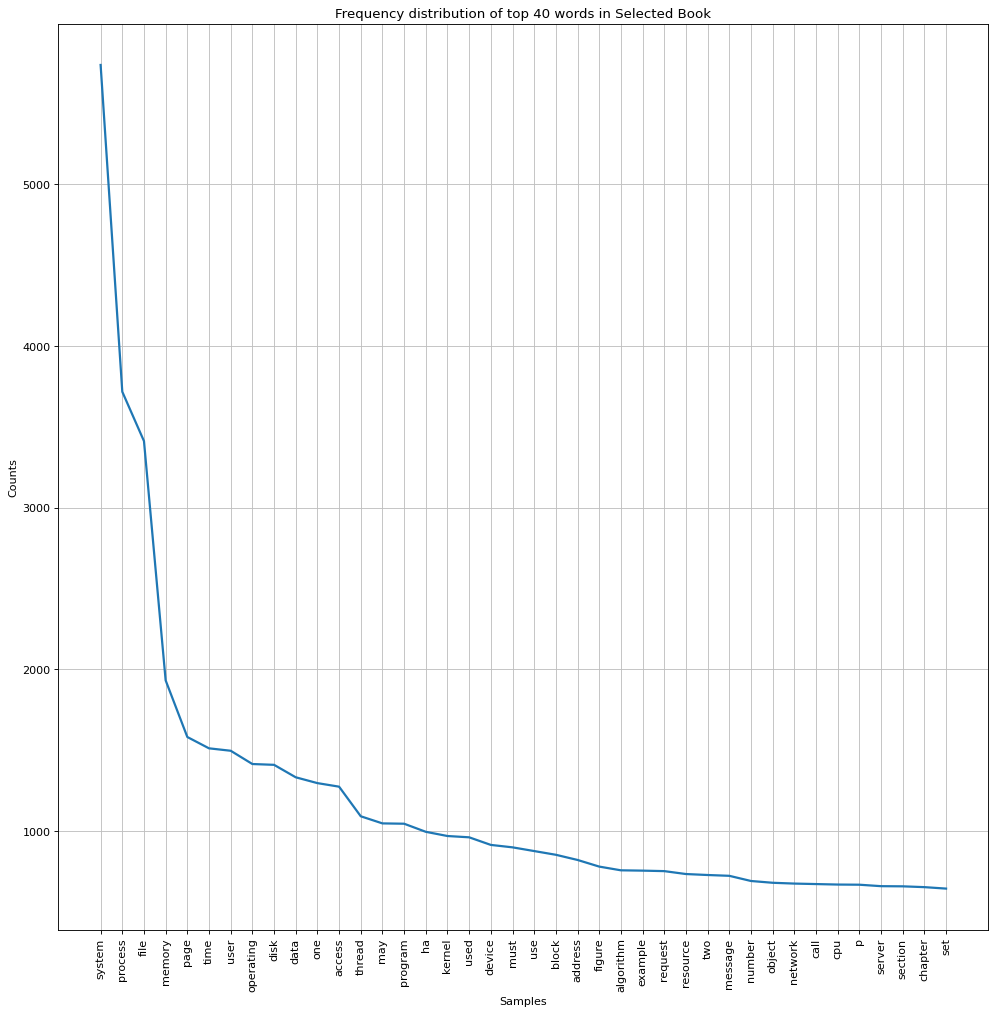

In [10]:
# Plotting the frequency distribution plot of the top 40 most frequent words for the book
figure(figsize=(15, 15), dpi = 80)
freq_graph = T1_frequency_distribution.plot(40, title = "Frequency distribution of top 40 words in Selected Book")

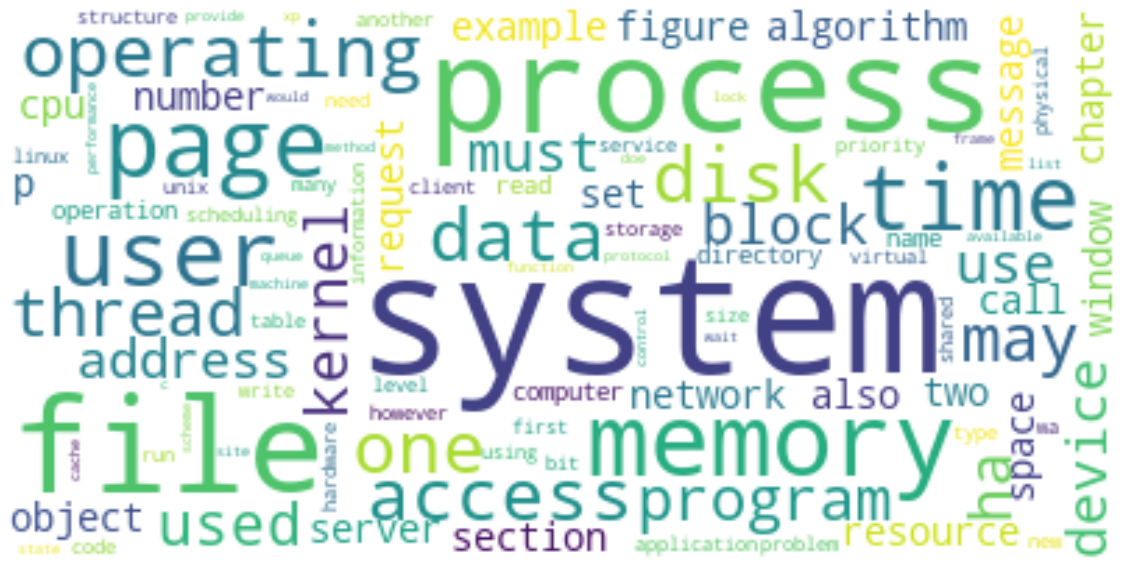

In [11]:
# Creating word cloud from the updated frequency distribution
dictionary = Counter(T1_frequency_distribution)
cloud = WordCloud(max_font_size = 60, max_words = 100, background_color = "white").generate_from_frequencies(dictionary)
plt.figure(figsize = (20, 20))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
# Counting frequency of words in T1 on the basis of word length
length_frequency_T1 = {}
for i, j in T1_frequency_distribution_org.items():
    x = len(i)
    if(x in length_frequency_T1):
        length_frequency_T1[x] += j
    else:
        length_frequency_T1[x] = j
length_frequency_T1 = OrderedDict(sorted(length_frequency_T1.items()))
length_frequency_T1

OrderedDict([(1, 21136),
             (2, 59015),
             (3, 62075),
             (4, 59093),
             (5, 28390),
             (6, 37675),
             (7, 34318),
             (8, 20946),
             (9, 18595),
             (10, 8753),
             (11, 7250),
             (12, 2198),
             (13, 1558),
             (14, 832),
             (15, 251),
             (16, 70),
             (17, 22),
             (18, 16),
             (19, 9),
             (20, 12),
             (21, 2),
             (22, 3),
             (23, 2),
             (24, 3),
             (25, 2),
             (26, 2),
             (29, 1)])

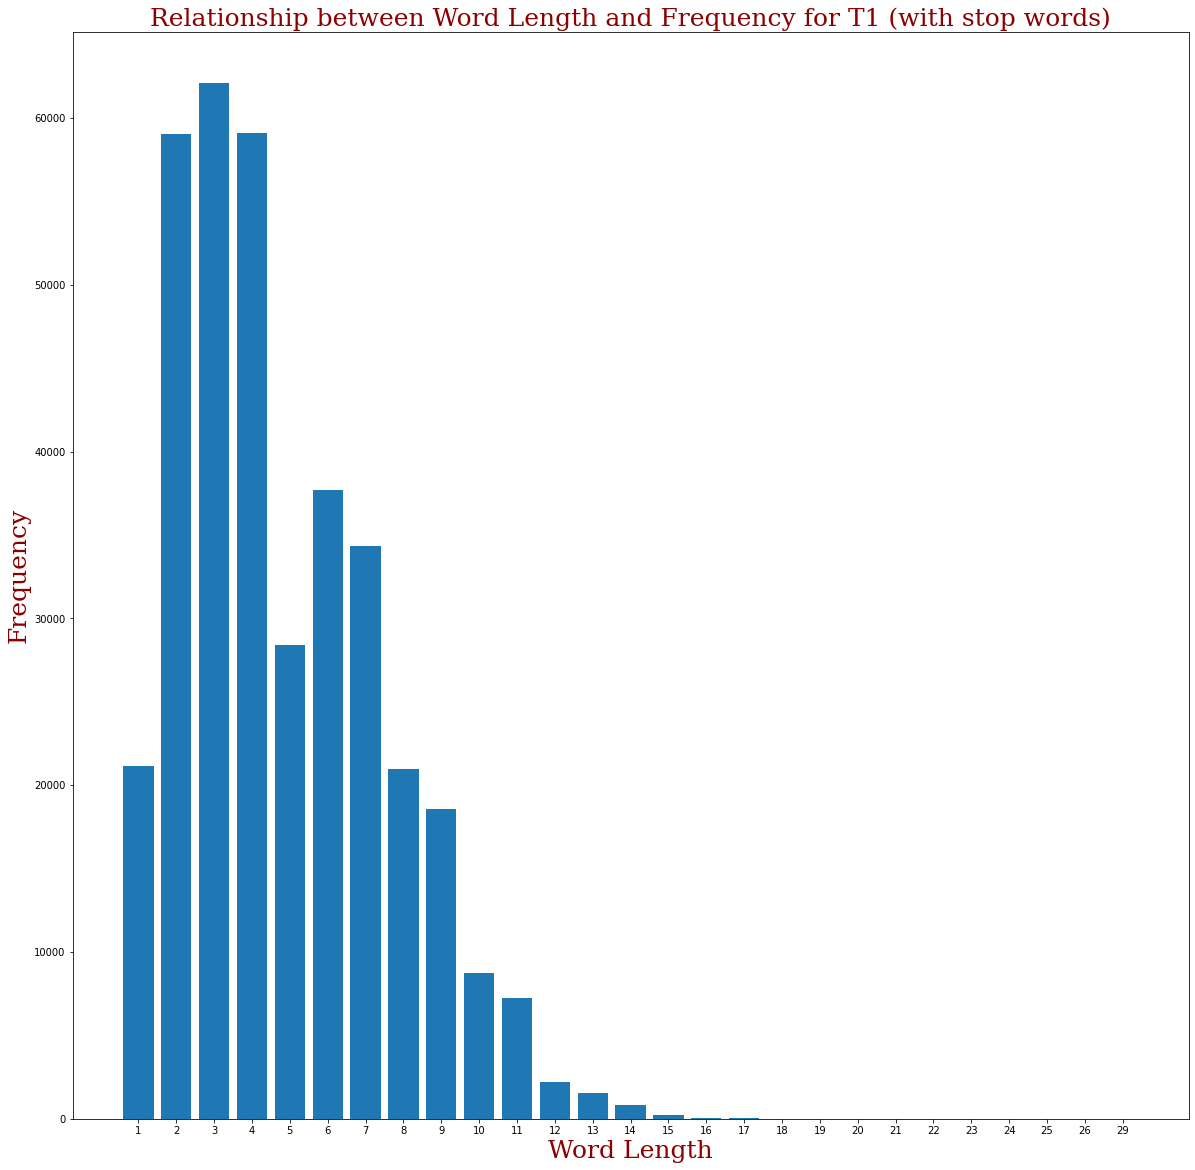

In [13]:
# Plotting word length vs Frequency graph
plt.figure(figsize = (20, 20))

plt.bar(range(len(length_frequency_T1)), list(length_frequency_T1.values()), align = 'center')

plt.xticks(range(len(length_frequency_T1)), list(length_frequency_T1.keys()))
font = {'family':'serif','color':'darkred','size':25}

plt.title("Relationship between Word Length and Frequency for T1 (with stop words)", fontdict = font, loc = "center")
plt.xlabel("Word Length", fontdict = font)
plt.ylabel("Frequency", fontdict = font)

plt.show()

In [14]:
# Counting frequency of words in T1 on the basis of word length (after removal of stop words)
length_frequency_T1 = {}
for i, j in T1_frequency_distribution.items():
    x = len(i)
    if(x in length_frequency_T1):
        length_frequency_T1[x] += j
    else:
        length_frequency_T1[x] = j
length_frequency_T1 = OrderedDict(sorted(length_frequency_T1.items()))
length_frequency_T1

OrderedDict([(1, 3045),
             (2, 4593),
             (3, 14262),
             (4, 37142),
             (5, 23426),
             (6, 36916),
             (7, 33086),
             (8, 20945),
             (9, 18592),
             (10, 8724),
             (11, 7250),
             (12, 2198),
             (13, 1558),
             (14, 832),
             (15, 251),
             (16, 70),
             (17, 22),
             (18, 16),
             (19, 9),
             (20, 12),
             (21, 2),
             (22, 3),
             (23, 2),
             (24, 3),
             (25, 2),
             (26, 2),
             (29, 1)])

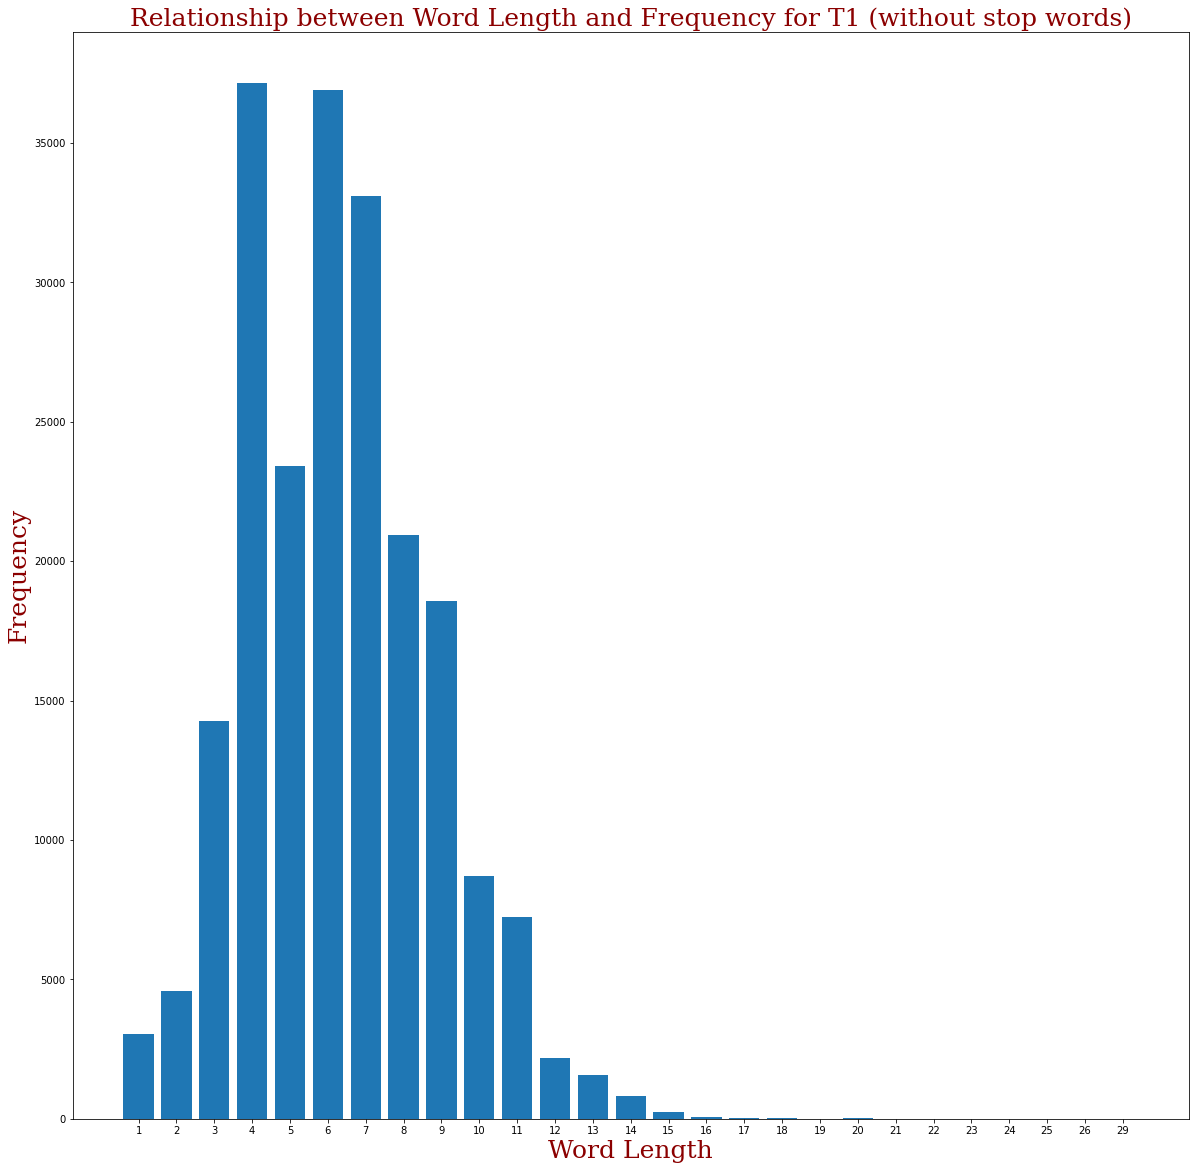

In [15]:
# Plotting word length vs Frequency graph
plt.figure(figsize = (20, 20))

plt.bar(range(len(length_frequency_T1)), list(length_frequency_T1.values()), align = 'center')

plt.xticks(range(len(length_frequency_T1)), list(length_frequency_T1.keys()))
font = {'family':'serif','color':'darkred','size':25}

plt.title("Relationship between Word Length and Frequency for T1 (without stop words)", fontdict = font, loc = "center")
plt.xlabel("Word Length", fontdict = font)
plt.ylabel("Frequency", fontdict = font)

plt.show()

In [16]:
book_one_path = "../input/processed-text-1/processed_text_1.txt"
Original_T1 = txt_file_to_string(book_one_path)
# Doing PoS tagging for T1 (using Penn Treebank Tagset) and obtaining distribution of tags for it 
words= [word_tokenize(i) for i in sent_tokenize(Original_T1)]
pos_tag= [nltk.pos_tag(i) for i in words]

tag_frequency_distribution = {}
for sent in pos_tag:
    for word, tag in sent:
        if tag in tag_frequency_distribution:
            tag_frequency_distribution[tag] += 1
        else:
            tag_frequency_distribution[tag] = 1
tag_frequency_distribution = OrderedDict(sorted(tag_frequency_distribution.items(), key=lambda item: item[1], reverse = True))
print(tag_frequency_distribution)

OrderedDict([('NN', 92505), ('DT', 47648), ('IN', 41378), ('JJ', 32195), ('NNS', 25560), ('VBZ', 16467), ('VB', 14953), ('VBN', 12796), ('RB', 12719), ('CC', 10344), ('TO', 10126), ('VBP', 9397), ('VBG', 8300), ('MD', 6461), ('PRP', 5242), ('WDT', 2900), ('VBD', 2810), ('CD', 2502), ('WRB', 1906), ('PRP$', 1551), ('JJR', 1152), ('RBR', 556), ('JJS', 554), ('RP', 474), ('WP', 388), ('PDT', 346), ('EX', 306), ('NNP', 290), ('RBS', 234), ('FW', 115), ('WP$', 46), ('SYM', 5), ("''", 2), ('$', 1)])


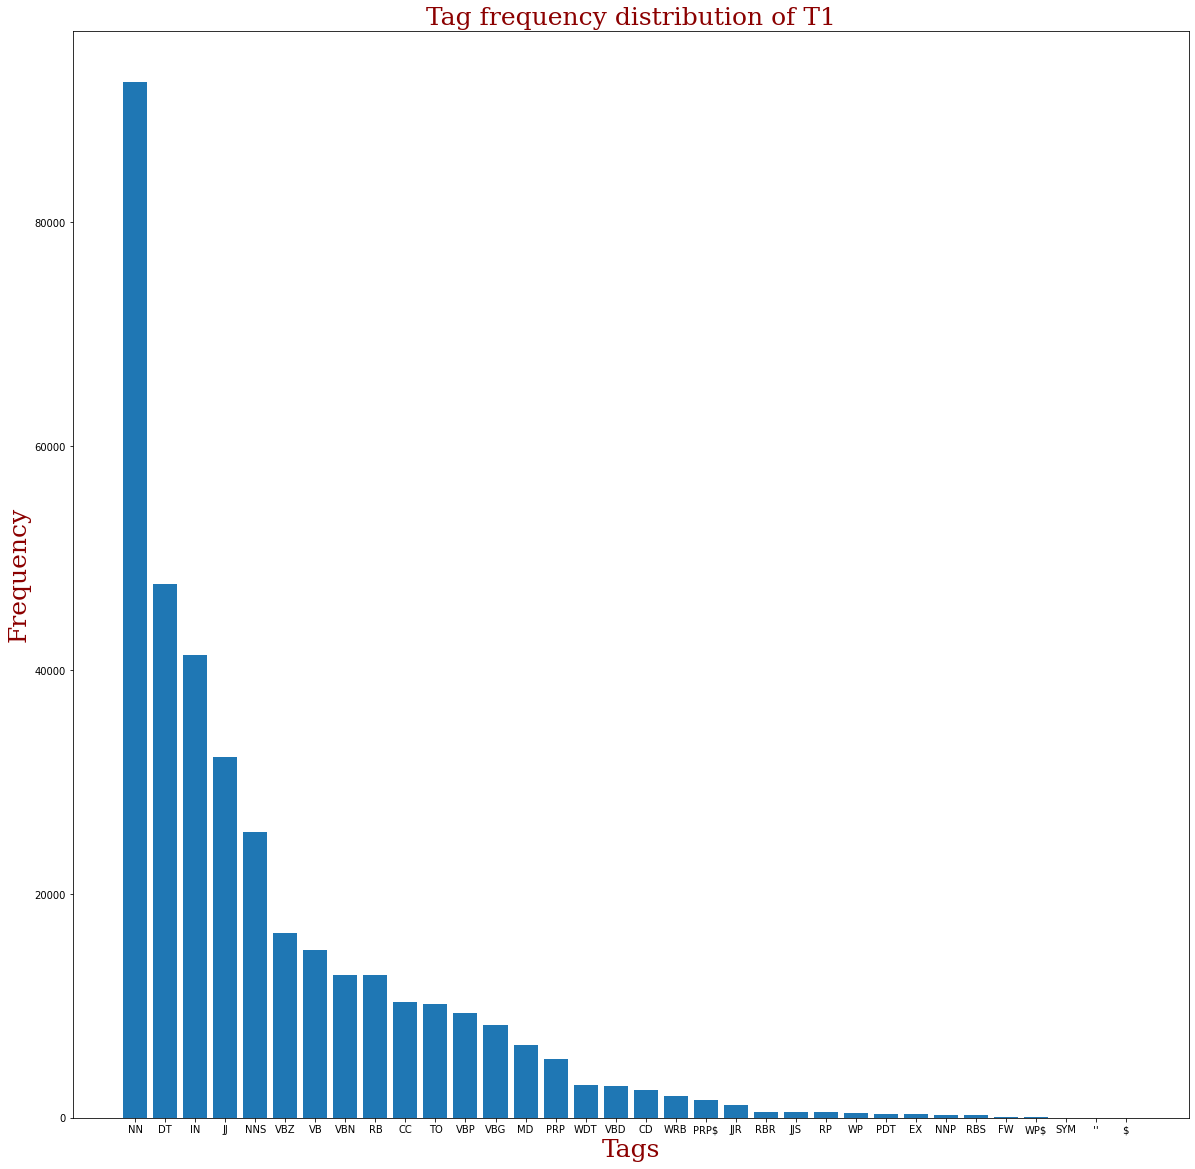

In [17]:
# Plotting tag frequency distribution of T1
plt.figure(figsize = (20, 20))

plt.bar(range(len(tag_frequency_distribution)), list(tag_frequency_distribution.values()), align = 'center')

plt.xticks(range(len(tag_frequency_distribution)), list(tag_frequency_distribution.keys()))
font = {'family':'serif','color':'darkred','size':25}

plt.title("Tag frequency distribution of T1", fontdict = font, loc = "center")
plt.xlabel("Tags", fontdict = font)
plt.ylabel("Frequency", fontdict = font)

plt.show()